In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('bread basket.csv')
print('DataFrame shape:', data.shape)
print(data)

DataFrame shape: (20507, 5)
       Transaction           Item         date_time period_day weekday_weekend
0                1          Bread  30-10-2016 09:58    morning         weekend
1                2   Scandinavian  30-10-2016 10:05    morning         weekend
2                2   Scandinavian  30-10-2016 10:05    morning         weekend
3                3  Hot chocolate  30-10-2016 10:07    morning         weekend
4                3            Jam  30-10-2016 10:07    morning         weekend
...            ...            ...               ...        ...             ...
20502         9682         Coffee  09-04-2017 14:32  afternoon         weekend
20503         9682            Tea  09-04-2017 14:32  afternoon         weekend
20504         9683         Coffee  09-04-2017 14:57  afternoon         weekend
20505         9683         Pastry  09-04-2017 14:57  afternoon         weekend
20506         9684      Smoothies  09-04-2017 15:04  afternoon         weekend

[20507 rows x 5 columns

In [7]:
# Format data waktu
data['date'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')


In [8]:
data["date_time"].dtype


dtype('O')

In [9]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['second'] = data['date'].dt.second
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,month,year,day,hour,minute,second
0,1,Bread,30-10-2016 09:58,morning,weekend,2016-10-30 09:58:00,10,2016,30,9,58,0
1,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30 10:05:00,10,2016,30,10,5,0
2,2,Scandinavian,30-10-2016 10:05,morning,weekend,2016-10-30 10:05:00,10,2016,30,10,5,0
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend,2016-10-30 10:07:00,10,2016,30,10,7,0
4,3,Jam,30-10-2016 10:07,morning,weekend,2016-10-30 10:07:00,10,2016,30,10,7,0


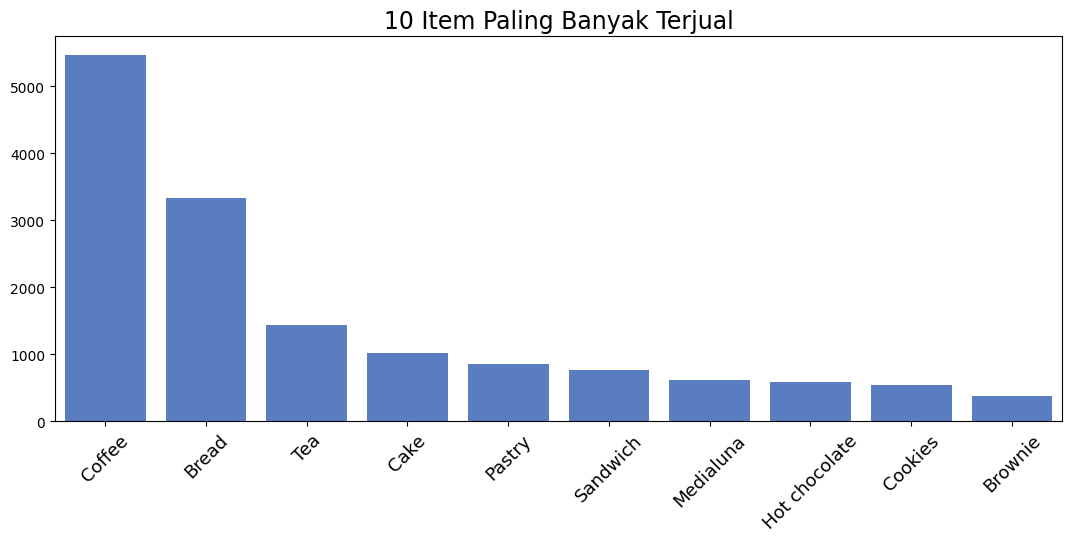

In [10]:
# menampilkan 10 item paling laris

plt.figure(figsize=(13, 5))
sns.set_palette("muted")

sns.barplot(x=data["Item"].value_counts()[:10].index, 
            y=data["Item"].value_counts()[:10].values)

plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Item Paling Banyak Terjual', size = 17)
plt.show()


Text(0, 0.5, 'Jumlah Transaksi')

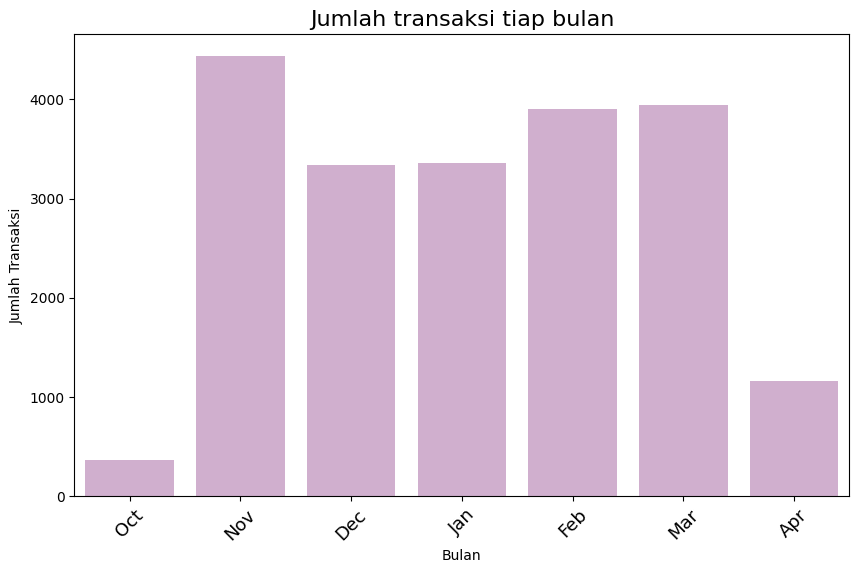

In [11]:
# Transaksi tiap bulan

data_perbulan = data.groupby(["month"])['Transaction'].count().sort_index()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

# Get the month names for the months present in the data
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
present_months = [month_names[i-1] for i in data_perbulan.index]

plt.figure(figsize=(10, 6))
sns.barplot(
    x=present_months,
    y=data_perbulan.values,
    color="#D5AAD3"
)
plt.xticks(size=13, rotation=45)
plt.title('Jumlah transaksi tiap bulan', size=16)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')

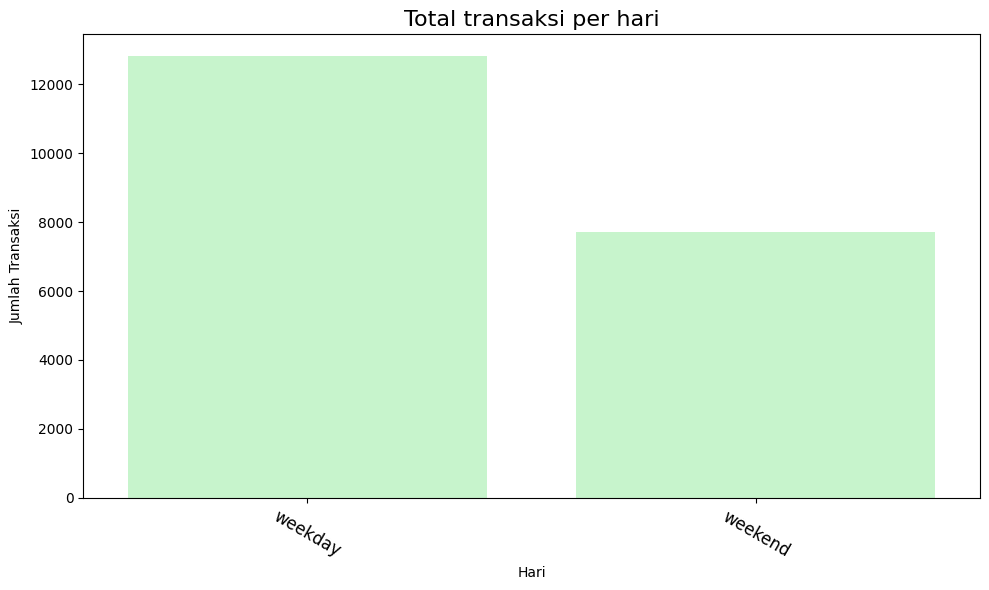

In [12]:
 # Transaksi per hari

data_perhari = data.groupby(["weekday_weekend"])['Transaction'].count()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=data_perhari.index,
    y=data_perhari.values,
    color="#BFFCC6"
)
plt.xticks(size=12, rotation=-30)
plt.title('Total transaksi per hari', size=16)
plt.xlabel('Hari')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()

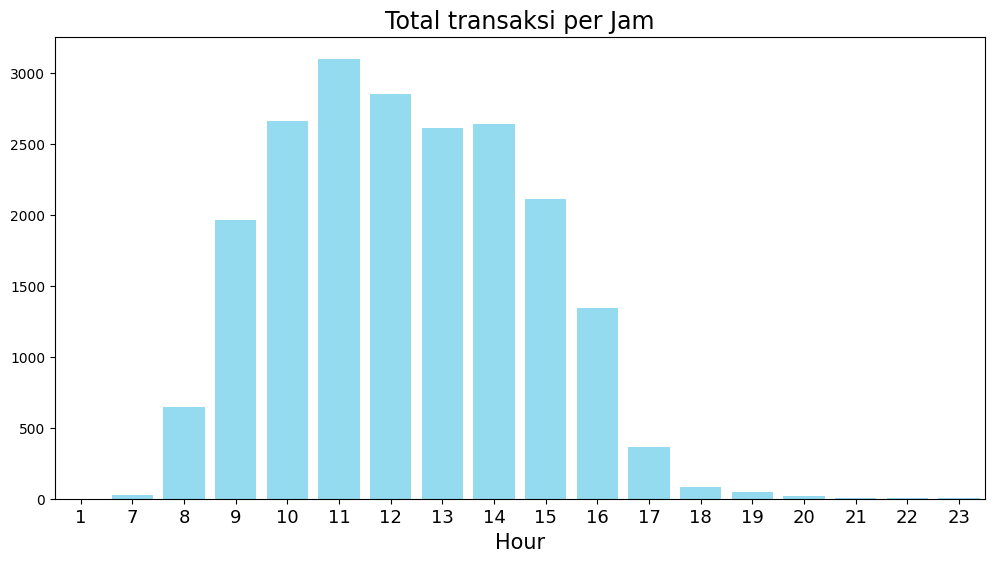

In [13]:
 # Transaksi per jam

data_perhour = data.groupby("hour")['Transaction'].count()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=data_perhour.index,
    y=data_perhour.values,
    color="#85E3FF"
)
plt.xticks(size=13)
plt.title('Total transaksi per Jam', size=17)
plt.xlabel('Hour', size=15)
plt.show()

In [14]:
## data preparation

In [15]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [16]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [17]:
data = data[["Transaction", "Item"]].copy()
data.head(10)


,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [3]:
from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [19]:
item_count_pivot = item_count.pivot_table(index="Transaction", columns="Item", values="Count", aggfunc='sum').fillna(0)
print("Ukuran Dataset :", item_count_pivot.shape)
item_count_pivot.head(5)

Ukuran Dataset : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
def encode(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
    
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17504\922225679.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(encode)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print("ukuran dataset :", item_count_pivot.shape)
print("Jumlah Transaksi :", item_count_pivot.shape[0])
print("Jumlah Item :", item_count_pivot.shape[1])

ukuran dataset : (9465, 94)
Jumlah Transaksi : 9465
Jumlah Item : 94


In [25]:
support_threshold = 0.01
frequent_items = apriori(item_count_pivot, min_support=support_threshold, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(bread, coffee)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


In [27]:
etric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values("confidence", ascending=False, inplace=True)
print(rules.head(15))

         antecedents consequents   support  confidence      lift
30           (toast)    (coffee)  0.023666    0.704403  1.472431
28  (spanish brunch)    (coffee)  0.010882    0.598837  1.251766
18       (medialuna)    (coffee)  0.035182    0.569231  1.189878
22          (pastry)    (coffee)  0.047544    0.552147  1.154168
0        (alfajores)    (coffee)  0.019651    0.540698  1.130235
16           (juice)    (coffee)  0.020602    0.534247  1.116750
24        (sandwich)    (coffee)  0.038246    0.532353  1.112792
6             (cake)    (coffee)  0.054728    0.526958  1.101515
27           (scone)    (coffee)  0.018067    0.522936  1.093107
12         (cookies)    (coffee)  0.028209    0.518447  1.083723
14   (hot chocolate)    (coffee)  0.029583    0.507246  1.060311
4          (brownie)    (coffee)  0.019651    0.490765  1.025860
21          (muffin)    (coffee)  0.018806    0.489011  1.022193
3           (pastry)     (bread)  0.029160    0.338650  1.034977
10            (cake)     